## Uses PyTrends
* Find Documenation here https://pypi.org/project/pytrends/
* First run pip install pytrends in terminal

In [13]:
# You need to run "pip install pytrends" in terminal in order to import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

colnames = ["keywords"]
df = pd.read_csv("search_terms.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-10 2020-08-05', # from and to dates here
     geo='US-IL') # 
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

df = pd.concat(dataset, axis=1)
df.to_csv('trends.csv')
executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))
print(df)

Execution time in sec.: 2.5845119953155518
            domestic violence hotline  domestic violence help  \
date                                                            
2020-01-10                          0                       0   
2020-01-11                          0                       0   
2020-01-12                          0                       0   
2020-01-13                          0                       0   
2020-01-14                          0                       0   
...                               ...                     ...   
2020-08-01                          0                       0   
2020-08-02                          0                       0   
2020-08-03                          0                       0   
2020-08-04                          0                       0   
2020-08-05                          0                       0   

            domestic abuse hotline  domestic abuse help  order of protection  
date                            

In [14]:
df = df.reset_index()
rangedf = df[(df['date'] >= '2020-01-10') & (df['date'] <= '2020-08-05')]
dfpre = rangedf[(rangedf['date'] >= '2020-01-10') & (rangedf['date'] <= '2020-03-19')]
dflockdown = rangedf[(rangedf['date'] >= '2020-03-20') & (rangedf['date'] <= '2020-05-28')]
dfpost = rangedf[(rangedf['date'] >= '2020-05-29') & (rangedf['date'] <= '2020-08-05')]

,date,domestic violence hotline,domestic violence help,domestic abuse hotline,domestic abuse help,order of protection
0,2020-01-10,0,0,0,0,0
1,2020-01-11,0,0,0,0,41
2,2020-01-12,0,0,0,0,0
3,2020-01-13,0,0,0,0,34
4,2020-01-14,0,0,0,0,0


In [101]:
import pingouin as pg
dfpre["group"] = 'Pre-lockdown'
dflockdown["group"] = 'Lockdown'
dfpost["group"] = 'Post-lockdown'
dfgroups = dfpre.iloc[:-1 , :].append(dflockdown).iloc[:-1 , :].append(dfpost).iloc[:-1 , :]
dfgroups['order of protection'] = dfgroups["order of protection"].astype(float)
dfgroups['domestic abuse help'] = dfgroups['domestic abuse help'].astype(float)
dfgroups['domestic abuse hotline'] = dfgroups['domestic abuse hotline'].astype(float)
dfgroups['domestic violence help'] = dfgroups['domestic violence help'].astype(float)
dfgroups['domestic violence hotline'] = dfgroups['domestic violence hotline'].astype(float)
dfgroups.groupby('group').mean()

<ipython-input-101-606f29363f12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpre["group"] = 'Pre-lockdown'
<ipython-input-101-606f29363f12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflockdown["group"] = 'Lockdown'
<ipython-input-101-606f29363f12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,domestic violence hotline,domestic violence help,domestic abuse hotline,domestic abuse help,order of protection
group,,,,,
Lockdown,4.842857,5.257143,5.328571,2.8,14.642857
Post-lockdown,5.652174,0.000000,2.869565,0.0,15.463768
Pre-lockdown,3.042857,2.414286,0.000000,0.0,19.542857


In [103]:
dfgroups.groupby('group').std()

,domestic violence hotline,domestic violence help,domestic abuse hotline,domestic abuse help,order of protection
group,,,,,
Lockdown,16.726821,18.059231,21.821889,16.448074,21.085083
Post-lockdown,16.970412,0.000000,16.731366,0.000000,22.196701
Pre-lockdown,15.142258,11.497313,0.000000,0.000000,23.822219


In [80]:
pg.anova(dv='domestic violence hotline', between='group', data=dfgroups,
               detailed=False).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,206,0.468,0.627,0.005


In [113]:
pg.welch_anova(dv='domestic violence help', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,92.0,4.477,0.014,0.03


In [117]:
pg.pairwise_tukey(dv='domestic violence help', between='group', data=dfgroups).round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Lockdown,Post-lockdown,5.257,0.000,5.257,2.102,2.501,0.035,0.422
1,Lockdown,Pre-lockdown,5.257,2.414,2.843,2.094,1.357,0.366,0.228
2,Post-lockdown,Pre-lockdown,0.000,2.414,-2.414,2.102,-1.149,0.487,-0.194


In [114]:
pg.welch_anova(dv='domestic abuse hotline', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,91.328,3.079,0.051,0.019


In [115]:
pg.welch_anova(dv='domestic abuse help', between='group', data=dfgroups).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,184.0,1.011,0.366,0.019


In [83]:
pg.anova(dv='order of protection', between='group', data=dfgroups,
               detailed=False).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,206,0.96,0.385,0.009


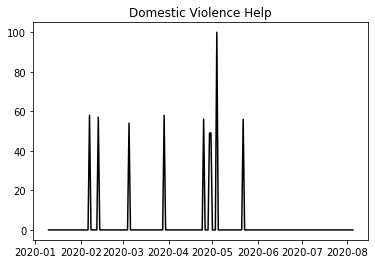

In [118]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all 5 trends in same chart
plt.figure()
plt.plot(dfgroups['date'], dfgroups["domestic violence help"],'black')
plt.title('Domestic Violence Help');

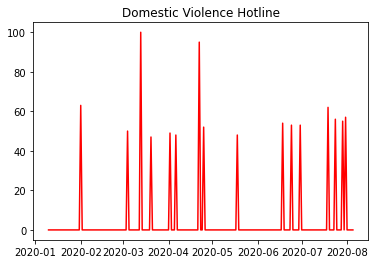

In [119]:
plt.figure()
plt.plot(dfgroups['date'], dfgroups["domestic violence hotline"],'red')
plt.title('Domestic Violence Hotline');

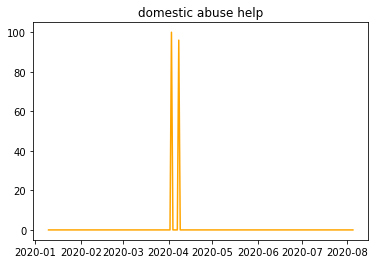

In [120]:
plt.figure()
plt.plot(dfgroups['date'],dfgroups["domestic abuse help"],'orange')
plt.title('domestic abuse help');

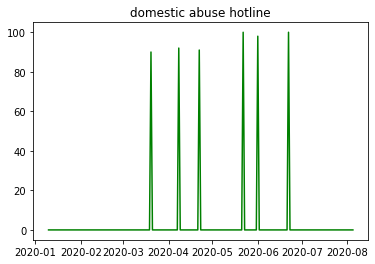

In [121]:
plt.figure()
plt.plot(dfgroups['date'],dfgroups["domestic abuse hotline"],'green')
plt.title('domestic abuse hotline');

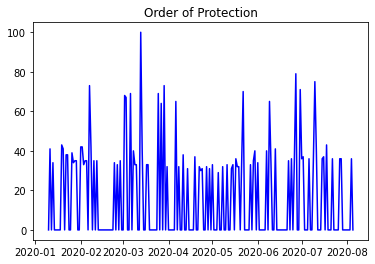

In [122]:
plt.figure()
plt.plot(dfgroups['date'],dfgroups["order of protection"],'blue')
plt.title('Order of Protection');

In [26]:
# plt.figure()
# plt.plot(df.index,df["domestic violence help near me"],'blue')
# plt.legend(['domestic violence help near me']);

In [124]:
# df.reset_index(level=0,inplace=True) #reset_index
# df.columns=['date','Domestic Violence Help','Domestic Violence Hotline','Order of Protection'] #change column names

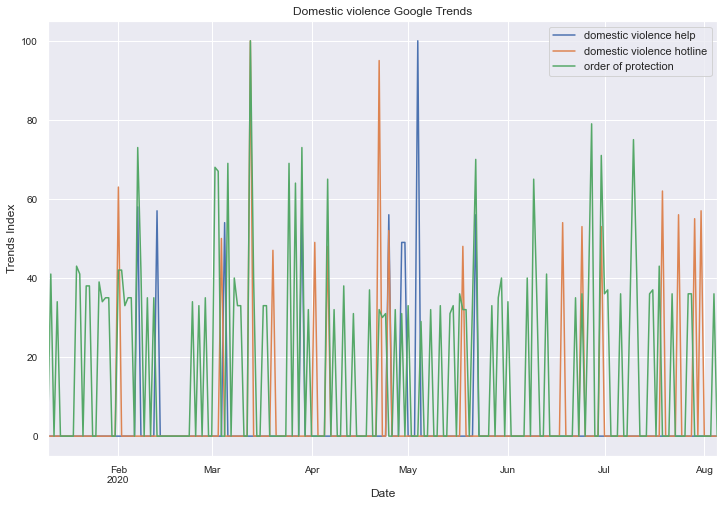

In [128]:
import seaborn as sns
sns.set(color_codes=True)
dx = dfgroups.plot(figsize = (12,8),x="date", y=['domestic violence help','domestic violence hotline','order of protection'], 
             kind="line", title = "Domestic violence Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)